In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\Data Science\Data Trained\Advertising sales\Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


All columns are numeric and continous in nature

In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.shape

(200, 5)

There are 200 rows and 5 columns

In [6]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

# Checking for Outliers:

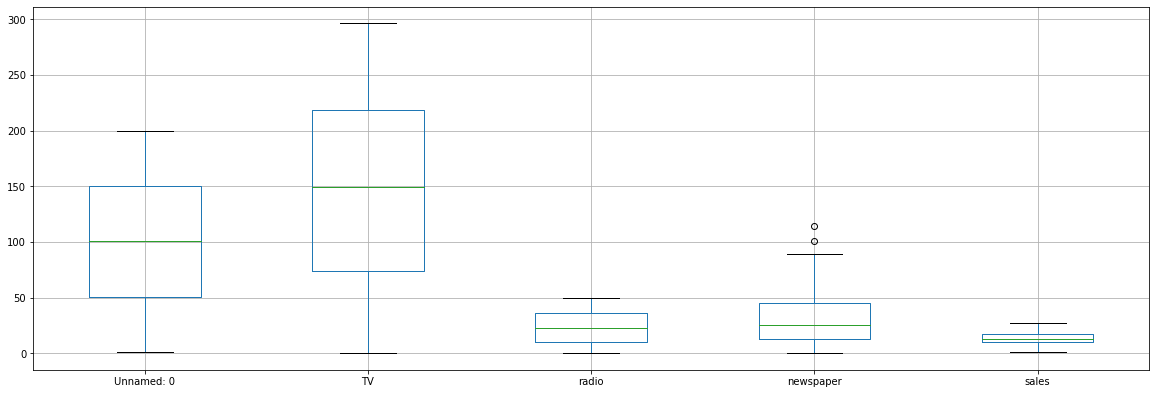

In [8]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

There are few Outliers in the newspaper coluumn

df.columns

# Univariate Analysis:

<AxesSubplot:xlabel='TV', ylabel='Density'>

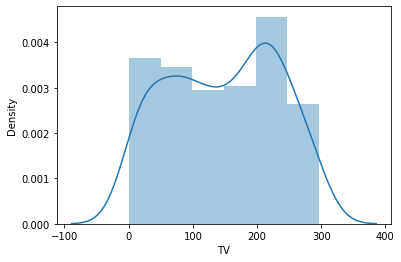

In [9]:
sn.distplot(df["TV"])

In [10]:
df["TV"].mean()

147.0425

In [11]:
df["TV"].median()

149.75

<AxesSubplot:xlabel='radio', ylabel='Density'>

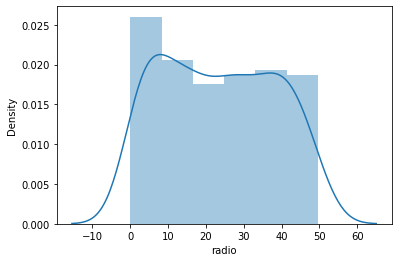

In [12]:
sn.distplot(df["radio"])

In [13]:
df["radio"].mean()

23.264000000000006

In [14]:
df["radio"].median()

22.9

radio column is somewhat normally distributed

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

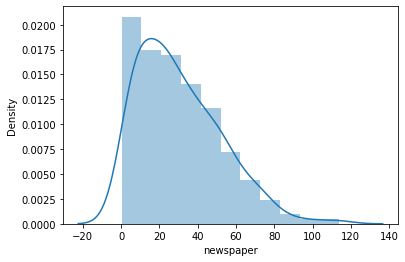

In [15]:
sn.distplot(df["newspaper"])

In [16]:
df["newspaper"].mean()

30.553999999999995

In [17]:
df["newspaper"].median()

25.75

newspaper column looks like a right skewed distribution

<AxesSubplot:xlabel='sales', ylabel='Density'>

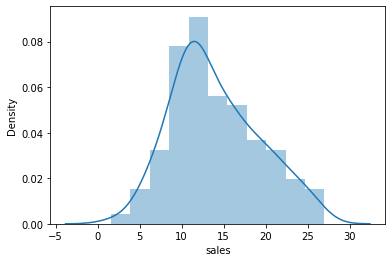

In [18]:
sn.distplot(df["sales"])

In [19]:
df["sales"].mean()

14.0225

In [20]:
df["sales"].median()

12.9

sales column seens normally distributed 

# Bivariate Analysis:

In [21]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

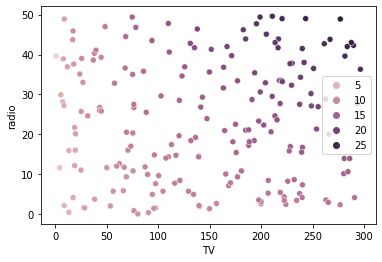

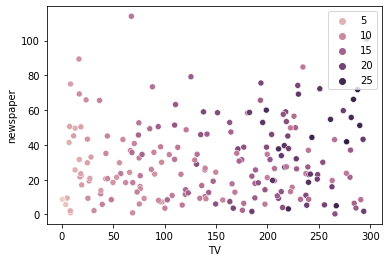

In [22]:
col=['radio', 'newspaper', ]
for i in col:

    figure = plt.figure
    ax = plt.gca()
    sn.scatterplot(df["TV"],df[i],hue=df["sales"])
    plt.legend()
    plt.show()

sales increases with the increase in TV and radio   

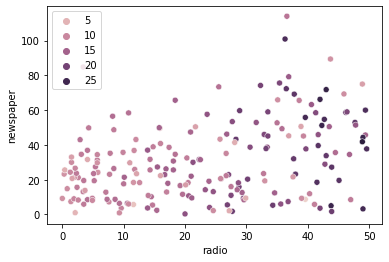

In [23]:
col=[ 'newspaper', ]
for i in col:

    figure = plt.figure
    ax = plt.gca()
    sn.scatterplot(df["radio"],df[i],hue=df["sales"])
    plt.legend()
    plt.show()

newspaper doesnt show any precise pattern

# Dropping unwanted columns:

In [24]:
df=df.drop("Unnamed: 0",axis=1)

In [25]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Corelation:

<AxesSubplot:>

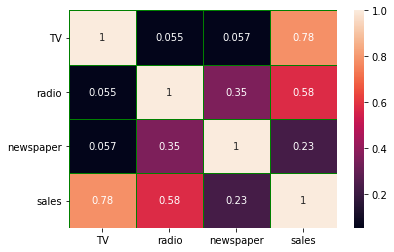

In [26]:
cor=df.corr()
sn.heatmap(cor,annot=True, linewidths=1,linecolor='green')

In [27]:
cor_matrix=df.corr()
cor_matrix["sales"].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

newspaper has the least corelation with sales column

# Outlier removal:

Zscore:

In [28]:
from scipy.stats import zscore

In [29]:
z=np.abs(zscore(df))

In [30]:
z_df=df[(z<3).all(axis=1)]

In [35]:
z_df.shape

(198, 4)

In [34]:
df.shape

(200, 4)

In [33]:
(1-(198/200))*100

1.0000000000000009

The data loss is 1 percent

In [36]:
new_df=z_df

In [37]:
new_df.describe()

,TV,radio,newspaper,sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,13.980808
std,85.443221,14.862111,20.446303,5.196097
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.325000,44.050000,17.375000
max,293.600000,49.600000,89.400000,27.000000


# Skewness:

In [38]:
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

Need to apply skewness transformation on newspaper

In [40]:
np.log(new_df["newspaper"]).skew()

-1.2218015871925096

In [41]:
np.sqrt(new_df["newspaper"]).skew()

-0.040649472621842535

In [44]:
new_df["newspaper"]=np.sqrt(new_df["newspaper"])

In [45]:
new_df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

# Separating Target and Independent variables:

In [46]:
x=new_df.drop(["sales"],axis=1)
y=new_df["sales"]

# Best Random State:

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [48]:
from sklearn.linear_model import LinearRegression
mod=LinearRegression()
maxAccu1=0
maxRS1=0
maxAccu2=0
maxRS2=0
for i in range(0,200):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.30, random_state=i)
    mod.fit(x_train,y_train)
    pred_train=mod.predict(x_train)
    pred_test=mod.predict(x_test)
    acc1=r2_score(y_train,pred_train)
    acc2=r2_score(y_test,pred_test)
    print(f"At Random state {i}, the training accuracy is: {r2_score(y_train,pred_train)}")
    print(f"At Random state {i}, the testing accuracy is: {r2_score(y_test,pred_test)}")
    print("\n")
    if acc1>maxAccu1:
        maxAccu1=acc1
        maxRS1=i
        
    if acc2>maxAccu2:
        maxAccu2=acc2
        maxRS2=i

At Random state 0, the training accuracy is: 0.8859171852526361
At Random state 0, the testing accuracy is: 0.9085766754449166


At Random state 1, the training accuracy is: 0.8858771150754233
At Random state 1, the testing accuracy is: 0.9060846743226347


At Random state 2, the training accuracy is: 0.9137931964481858
At Random state 2, the testing accuracy is: 0.858390209570677


At Random state 3, the training accuracy is: 0.9022418129548119
At Random state 3, the testing accuracy is: 0.881151099362858


At Random state 4, the training accuracy is: 0.9001356560735017
At Random state 4, the testing accuracy is: 0.8721501634616875


At Random state 5, the training accuracy is: 0.8958773120025212
At Random state 5, the testing accuracy is: 0.8876772944866962


At Random state 6, the training accuracy is: 0.9017970617509014
At Random state 6, the testing accuracy is: 0.8795336830790139


At Random state 7, the training accuracy is: 0.892384696390841
At Random state 7, the testing accur

In [49]:
print("Best train accuracy is",maxAccu1,"on Random_state",maxRS1)
print("\n")
print("Best test accuracy is",maxAccu2,"on Random_state",maxRS2)

Best train accuracy is 0.9238019178213818 on Random_state 10


Best test accuracy is 0.9359870808019579 on Random_state 90


# Train and Test Split:

In [50]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.30, random_state=90)

# Linear Regression:

In [51]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_test=LR.predict(x_test)

print(r2_score(y_test,pred_test))

0.9359870808019579


# Decision Tree Regression:

In [52]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_test=DTR.predict(x_test)

print(r2_score(y_test,pred_test))

0.9665964233213924


# RandomForestRegressor:

In [53]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_test=RFR.predict(x_test)

print(r2_score(y_test,pred_test))

0.9712004307125149


# SupportVectorRegressor:

In [54]:
from sklearn.svm import SVR
SV= SVR()
SV.fit(x_train,y_train)
pred_test=SV.predict(x_test)

print(r2_score(y_test,pred_test))

0.7836444169989594


# LinearSVR:

In [55]:
from sklearn.svm import LinearSVR
LSV= LinearSVR()
LSV.fit(x_train,y_train)
pred_test=LSV.predict(x_test)

print(r2_score(y_test,pred_test))

0.7764652910055043


# AdaBoostRegressor:

In [56]:
from sklearn.ensemble import AdaBoostRegressor
ADR= AdaBoostRegressor()
ADR.fit(x_train,y_train)
pred_test=ADR.predict(x_test)

print(r2_score(y_test,pred_test))

0.9426623617984617


# BaggingRegressor:

In [57]:
from sklearn.ensemble import BaggingRegressor
BR= BaggingRegressor()
BR.fit(x_train,y_train)
pred_test=BR.predict(x_test)

print(r2_score(y_test,pred_test))

0.9701637140841594


# ExtraTreesRegressor:

In [58]:
from sklearn.ensemble import ExtraTreesRegressor
ETR= ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred_test=ETR.predict(x_test)

print(r2_score(y_test,pred_test))

0.9909661712622726


# GradientBoostingRegressor:

In [147]:
from sklearn.ensemble import GradientBoostingRegressor
GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_test=GBR.predict(x_test)

print(r2_score(y_test,pred_test))

0.9769484320565014


# PLSRegression:

In [60]:
from sklearn.cross_decomposition import PLSRegression
PLSR=PLSRegression()
PLSR.fit(x_train,y_train)
pred_test=PLSR.predict(x_test)

print(r2_score(y_test,pred_test))


0.9303590842288714


# SGDRegressor:

In [70]:
from sklearn.linear_model import SGDRegressor
SGDR=SGDRegressor()
SGDR.fit(x_train,y_train)
pred_test=SGDR.predict(x_test)

print(r2_score(y_test,pred_test))


-2.785475677473511e+25


# ARDRegression:

In [64]:
from sklearn.linear_model import ARDRegression
ARDR=ARDRegression()
ARDR.fit(x_train,y_train)
pred_test=ARDR.predict(x_test)

print(r2_score(y_test,pred_test))


0.9382960309315028


# BayesianRidge:

In [65]:
from sklearn.linear_model import BayesianRidge
BAYR=BayesianRidge()
BAYR.fit(x_train,y_train)
pred_test=BAYR.predict(x_test)

print(r2_score(y_test,pred_test))


0.936378883862725


# HuberRegressor:

In [66]:
from sklearn.linear_model import HuberRegressor
HR=HuberRegressor()
HR.fit(x_train,y_train)
pred_test=HR.predict(x_test)

print(r2_score(y_test,pred_test))

0.9263918015359888


# TheilSenRegressor:

In [67]:
from sklearn.linear_model import TheilSenRegressor
TR=TheilSenRegressor()
TR.fit(x_train,y_train)
pred_test=TR.predict(x_test)

print(r2_score(y_test,pred_test))

0.9106844536960641


# Cross Validation Score:

In [85]:
from sklearn.model_selection import cross_val_score

In [73]:
print(cross_val_score(LR,x,y,cv=5).mean())

0.8857406146589945


In [74]:
(0.9359870808019579-0.8857406146589945)*100

5.024646614296346

In [86]:
print(cross_val_score(DTR,x,y,cv=5).mean())

0.9495076750155664


In [87]:
(0.9665964233213924-0.9495076750155664)*100

1.7088748305825963

In [88]:
print(cross_val_score(RFR,x,y,cv=5).mean())

0.9752737386589108


In [89]:
(0.9712004307125149-0.9752737386589108)*100

-0.4073307946395821

In [90]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.8351936374128008


In [80]:
(0.7836444169989594-0.8351936374128008)*100

-5.154922041384147

In [91]:
print(cross_val_score(LSV,x,y,cv=5).mean())

0.7198456754262553


In [92]:
(0.7764652910055043-0.7198456754262553)*100

5.661961557924899

In [83]:
print(cross_val_score(ADR,x,y,cv=5).mean())

0.9538525591434313


In [93]:
(0.9426623617984617-0.9538525591434313)*100

-1.119019734496951

In [141]:
print(cross_val_score(BR,x,y,cv=5).mean())

0.9736917250921614


In [142]:
(0.9701637140841594-0.9736917250921614)*100

-0.3528011008002041

In [130]:
print(cross_val_score(ETR,x,y,cv=5).mean())

0.9877082337851789


In [131]:
(0.9909661712622726-0.9877082337851789)*100

0.32579374770936864

In [149]:
print(cross_val_score(GBR,x,y,cv=5).mean())

0.9782274070930754


In [150]:
(0.9769484320565014-0.9782274070930754)*100

-0.1278975036574037

In [100]:
print(cross_val_score(PLSR,x,y,cv=5).mean())

0.8861766860406531


In [101]:
(0.9303590842288714-0.8861766860406531)*100

4.418239818821823

In [103]:
print(cross_val_score(SGDR,x,y,cv=5).mean())

-1.80299515967118e+25


In [106]:
(2.785475677473511e+25+1.80299515967118e+25)*100

4.588470837144691e+27

In [107]:
print(cross_val_score(ARDR,x,y,cv=5).mean())

0.8876296450110418


In [108]:
(0.9382960309315028-0.8876296450110418)*100

5.066638592046102

In [109]:
print(cross_val_score(BAYR,x,y,cv=5).mean())

0.8862511620971709


In [110]:
(0.936378883862725-0.8862511620971709)*100

5.012772176555414

In [111]:
print(cross_val_score(HR,x,y,cv=5).mean())

0.8812083543296556


In [112]:
(0.9263918015359888-0.8812083543296556)*100

4.518344720633316

In [113]:
print(cross_val_score(TR,x,y,cv=5).mean())

0.8698232977124396


In [114]:
(0.9106844536960641-0.8698232977124396)*100

4.08611559836245

Since DecisionTreeRegressor,RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor and GradientBoostingRegressor have the least difference between accuracy and cross validation score, need to check for evaluation metrics

# Evaluation Metrics:

In [115]:
import math
from sklearn.metrics import mean_absolute_error,mean_squared_error

DecisionTreeRegressor:

In [116]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_test=DTR.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,pred_test)))
print("MAE:",mean_absolute_error(y_test,pred_test))

MSE: 0.9643333333333326
RMSE: 0.9820047521948825
MAE: 0.7699999999999998


RandomForestRegressor:

In [117]:
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_test=RFR.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,pred_test)))
print("MAE:",mean_absolute_error(y_test,pred_test))

MSE: 0.6629724333333292
RMSE: 0.8142311915748065
MAE: 0.6644333333333327


AdaBoostRegressor:

In [118]:
ADR= AdaBoostRegressor()
ADR.fit(x_train,y_train)
pred_test=ADR.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,pred_test)))
print("MAE:",mean_absolute_error(y_test,pred_test))

MSE: 1.1202476176682983
RMSE: 1.0584175063122767
MAE: 0.8685658717360346


BaggingRegressor:

In [119]:
BR= BaggingRegressor()
BR.fit(x_train,y_train)
pred_test=BR.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,pred_test)))
print("MAE:",mean_absolute_error(y_test,pred_test))

MSE: 0.5501683333333335
RMSE: 0.741733330337348
MAE: 0.6041666666666665


ExtraTreesRegressor:

In [120]:
ETR= ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred_test=ETR.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,pred_test)))
print("MAE:",mean_absolute_error(y_test,pred_test))

MSE: 0.23041046666666187
RMSE: 0.4800109026539521
MAE: 0.40586666666666243


GradientBoostingRegressor:

In [121]:
GBR= GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_test=GBR.predict(x_test)
print("MSE:",mean_squared_error(y_test,pred_test))
print("RMSE:",math.sqrt(mean_squared_error(y_test,pred_test)))
print("MAE:",mean_absolute_error(y_test,pred_test))

MSE: 0.5614396304157072
RMSE: 0.7492927534787103
MAE: 0.6062013540519494


Since ExtraTreesRegressor  is the best model in terms of accuracy and cross validation difference as well as the evaluation metrics, we chose ExtraTreesRegressor to be the final model

# Hyper Parameter Tuning:

In [151]:
parameter = { 

    'criterion': ["mse","mae"],
    
    'max_depth' : [4,5,6,7,8],

    'max_features' :["auto", "sqrt", "log2"],

    'min_samples_split' : np.arange(2,10),
}

In [152]:
from sklearn.model_selection import GridSearchCV
GV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)
GV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [153]:
GV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_split': 5}

# Finalizing the Model:

In [158]:
Final_mod=ExtraTreesRegressor(criterion= 'mse',
 max_depth=8 ,max_features= 'auto',
 min_samples_split=5)

In [159]:
Final_mod.fit(x_train,y_train)
final_pred=Final_mod.predict(x_test)
final_acc=r2_score(y_test,final_pred)

In [160]:
print(final_acc*100)

99.11331099308751


In [164]:
print((cross_val_score(Final_mod,x,y,cv=5).mean())*100)

98.62998885108422


In [165]:
import pickle
filename="Advertising.pk1"
pickle.dump(Final_mod,open(filename,"wb"))

# Conclusion:

In [166]:
loaded_model=pickle.load(open("Advertising.pk1","rb"))
result=loaded_model.score(x_test, y_test)
print(result)

0.9911331099308751


In [168]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Predicted,17.850041,6.579315,22.803881,19.244666,16.110663,21.68704,21.353786,13.111708,22.603819,9.01143,...,11.527998,14.37525,10.584097,8.177137,17.597657,15.235763,8.38278,11.73315,12.160804,11.159562
Original,18.000000,5.600000,22.300000,19.600000,16.600000,22.20000,21.500000,13.200000,22.400000,8.80000,...,11.400000,14.60000,10.800000,7.600000,17.300000,15.500000,8.50000,11.60000,11.700000,11.000000
